This project will look at datasets from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) in Queensland, Australia. We will seek to discover reasons for resignation from these datasets, which are exit surveys. Specifically, comparing dissatisfaction between short-term and long-term employment, and younger and older employees.

In [35]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

dete_survey.info()
dete_survey.head()
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

                                     ...                                     \
0                                    ...                                      
1                                    ...                                      
2                                    ...                                      
3                                    ...                                      
4                                    ...                                      

  Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?  \
0                                                Yes                                                            
1                                                Yes                                                            
2                                                Yes                                                            
3                                                Yes                                                            
4                                                Yes                                                            

  Workplace. Topic:Does your workplace promote and practice the principles of employment equity?  \
0                                                Yes                                               
1                                                Yes                                               
2                                                Yes                                               
3                                                Yes                                               
4                                                Yes  

In [36]:
print(dete_survey.isnull().sum())
print(tafe_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [37]:
tafe_survey.shape

(702, 72)

Even at the beginning, we can tell that there are a few problems that will need to be examined more closely or fixed. In the DETE survey, there are several columns with non-trivial numbers of null values. However, some of these may just indicate that the column was not applicable to the survey responder (e.g. "Aboriginal": 806 missing values or "Disability": 799.
The TAFE has bigger problems, in my opinion, in that the column names are all questions and essentially unreadable as they stand currently. A potential solution will be to melt together columns that have the same overal topic. 

In [38]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Because the goal of this project is to explore the link between "dissatisfaction" specifically and other factors, many of the columns were unnecessary and therefore dropped. Additionally, with the knowledge that the primary N/A response is "Not Stated", we were able to use that to read those values as Not a Number or NaN.

In [39]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [40]:
tafe_survey_updated = tafe_survey_updated.rename(columns = {
    "Record ID":"id",
    "CESSATION YEAR":"cease_date",
    "Reason for ceasing employment":"separationtype",
    "Gender. What is your Gender?":"gender",
    "CurrentAge. Current Age":"age",
    "Employment Type. Employment Type":"employment_status",
    "Classification. Classification":"position",
    "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service"
})

In [41]:
print(dete_survey_updated.head())
print(tafe_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In order to better work with these datasets, it was necessary to normalize the column names and make them consistent with each other, especially when the columns represented the same things. Additionally, as mentioned before, column names from the TAFE survey were especially unreadable. Whoever made the data to begin with did not consider usability.
From a practical standpoint, removing spaces and condensing column names is helpful when using an editor or IDE with code completion, saving time when working with the same variables multiple times (especially reassignment).

In [42]:
print(dete_survey_updated["separationtype"].value_counts())
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [43]:
dete_resign_bool = dete_survey_updated["separationtype"].str.contains("Resignation").copy()

In [44]:
dete_resignations = dete_survey_updated[dete_resign_bool]

In [45]:
tafe_survey_updated = tafe_survey_updated.dropna(subset=["separationtype"])
print(tafe_survey_updated["separationtype"].isnull().sum())

0


In [46]:
tafe_resign_bool = tafe_survey_updated["separationtype"].str.contains("Resignation").copy()
tafe_resignations = tafe_survey_updated[tafe_resign_bool]

While attempting to select only the resignation data from the surveys, I ran into an issue with the tafe dataframe. Passing in boolean values was not working, and it turned out that there was a null value remaining in the column. The row appeared to be entirely null, so I decided to drop that row, fixing the issue.

In [47]:
print(dete_resignations["cease_date"].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64


In [48]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract("([1-2][0-9]{3})").astype("float")
print(dete_resignations["cease_date"].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
print(dete_resignations["dete_start_date"].value_counts().sort_index())

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [50]:
print(tafe_resignations["cease_date"].value_counts())

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


So far, we can see that DETE has had several hundred resignations since 2012, while TAFE has not had any since 2011. There appear to be more recent hires resigning than older hires, but that could also be because there are fewer old hires left to begin with.

In [51]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
dete_resignations["institute_service"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In order to properly compare DETE and TAFE, we needed to have similar columns, which is why a comparable "institute service" column had to be created.

In [53]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True

In [54]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [55]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [56]:
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
print(tafe_resignations_up["dissatisfied"].value_counts(dropna=False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
dete_resignations["dissatisfied"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
print(dete_resignations_up["dissatisfied"].value_counts(dropna=False))

False    162
True     149
Name: dissatisfied, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Like the previous example of creating a consistent "Institute service" column, here it was important to generalize all the dissatisfaction columns into one in each dataframe so that they can be compared when the two dataframes are merged.

In [58]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined_updated = combined.dropna(thresh = 500, axis=1).copy()

In [59]:
combined_updated.shape

(651, 10)

In order to differentiate the data once the dataframes were merged, we added an Institute column. Additionally, we dropped columns with fewer than 500 non-null values (read: 500 missing values, or 76% of the rows).

In [60]:
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")
print(combined_updated["institute_service"].value_counts(dropna=False))
print(combined_updated["institute_service_up"].value_counts(dropna=False))

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
12.0                   6
10.0                   6
14.0                   6
22.0                   6
17.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [61]:
def service_cats(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [62]:
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(service_cats)
combined_updated["service_cat"].head(5)

0    Established
1        Veteran
2    Experienced
3        Veteran
4    Experienced
Name: service_cat, dtype: object

An article from BusinessWire suggests that "career stage" in a better basis of analysis than age regarding employees. Therefore we applied a simple categorization function to the institute service column, which will now allow for comparison based on employee career stage.

In [63]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [64]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(value=False)

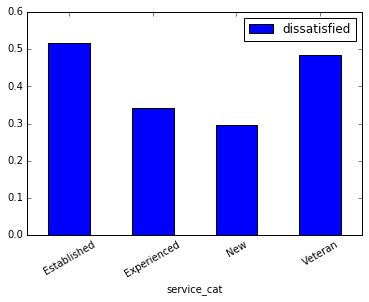

In [66]:
pv_dissatisfied = combined_updated.pivot_table(index="service_cat", values="dissatisfied")
%matplotlib inline
pv_dissatisfied.plot(kind="bar", rot=30)

Based on our output, we can see that new employees are actually the least dissatisfied with their jobs. A cynical view would be that they have not yet become jaded, as all other categories have higher levels of dissatisfaction, with the Established category (7-11 years) having 50